1. Correlation
2. Average
3. Mean clustering
4. Variance and covariance matrix
5. Extracted lambas, Av-lv = 0
6. Eigen value-> Eigen vector 
7. Multiplied mean centred data with eigen vector
8. Dimension reduction by removing vector with the lowest eigen value
9. Equations of PC
10. Three things you can do with PCA: dim reduction, feed the PC data to linear regression, clustering

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

If you use the drop command mention axis and Inplace = TRUE, because it is going to be a permanent change. Standard Deviation is different from Normalisation. 

In [ ]:
#Read and standardize data
df = pd.read_csv("Survey.csv")
df = df.iloc[:,1:10]
X_std = StandardScaler().fit_transform(df)

#obtain the variance/covariance matrix
cov_matrix = np.cov(X_std.T)
print("Cov Mat \n%s", cov_matrix)

Cov Mat 
%s [[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
   0.075904

,Climate,Housing,Healthcare,Crime,Transportation,Education,Arts,Recreation,Economic
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


In [ ]:
#obtain eigen values and vectors
eig_vals , eig_vecs = np.linalg.eig(cov_matrix)
print("Eigen Vectors \n", eig_vecs)
print("\n Eigen Values \n", eig_vals)

Eigen Vectors 
 [[ 2.06413954e-01  2.17835308e-01  6.89955982e-01  1.37321246e-01
  -3.69149929e-01 -3.74604694e-01  8.47057741e-02  3.62308330e-01
   1.39135150e-03]
 [ 3.56521608e-01  2.50624000e-01  2.08172230e-01  5.11828708e-01
   2.33487781e-01  1.41639825e-01  2.30638624e-01 -6.13855131e-01
   1.36003402e-02]
 [ 4.60214647e-01 -2.99465282e-01  7.32492550e-03  1.47018320e-02
  -1.03240518e-01  3.73848037e-01 -1.38676115e-02  1.85676120e-01
  -7.16354893e-01]
 [ 2.81298380e-01  3.55342273e-01 -1.85104981e-01 -5.39050473e-01
  -5.23939687e-01 -8.09232850e-02 -1.86064572e-02 -4.30024765e-01
  -5.86084614e-02]
 [ 3.51150781e-01 -1.79604477e-01 -1.46376283e-01 -3.02903705e-01
   4.04348475e-01 -4.67591803e-01  5.83390970e-01  9.35986618e-02
   3.62945266e-03]
 [ 2.75292636e-01 -4.83382093e-01 -2.29702548e-01  3.35411034e-01
  -2.08819059e-01 -5.02169811e-01 -4.26181860e-01 -1.88667565e-01
   1.10840191e-01]
 [ 4.63054489e-01 -1.94789920e-01  2.64842979e-02 -1.01080391e-01
  -1.0509763

There are 9 variables, every dimension is associated with one eigen value. 

In [ ]:
#variation can never be negative
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(3.4186829341737663,
  array([0.20641395, 0.35652161, 0.46021465, 0.28129838, 0.35115078,
         0.27529264, 0.46305449, 0.32788791, 0.13541225])),
 (1.217677313155327,
  array([ 0.21783531,  0.250624  , -0.29946528,  0.35534227, -0.17960448,
         -0.48338209, -0.19478992,  0.38447464,  0.47128328])),
 (1.1449592665579513,
  array([ 0.68995598,  0.20817223,  0.00732493, -0.18510498, -0.14637628,
         -0.22970255,  0.0264843 ,  0.05085264, -0.60731447])),
 (0.9237254999052622,
  array([ 0.13732125,  0.51182871,  0.01470183, -0.53905047, -0.30290371,
          0.33541103, -0.10108039, -0.18980082,  0.42176994])),
 (0.7555814784171866,
  array([-0.36914993,  0.23348778, -0.10324052, -0.52393969,  0.40434848,
         -0.20881906, -0.10509764,  0.52954058, -0.15962006])),
 (0.6324843418624428,
  array([-0.37460469,  0.14163983,  0.37384804, -0.08092329, -0.4675918 ,
         -0.50216981,  0.46188072, -0.08991578, -0.03260813])),
 (0.4945509144183733,
  array([ 0.08470577,  0.230

last class mei, we had lamda1/Sigma ladma 1 to n, lamda1+lamda2/Sigma ladma 1 to n

In [ ]:
#compute the cumulative variance
#we are calculaing percentage variance: lambda_i/Sigma ladma 1 to n, where n is the number of features
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)
print("cumulative Variance Explained", cum_var_exp)


cumulative Variance Explained [ 37.8699089   51.35853297  64.0416346   74.27405486  82.64388684
  89.65013014  95.12843815  98.66219912 100.        ]


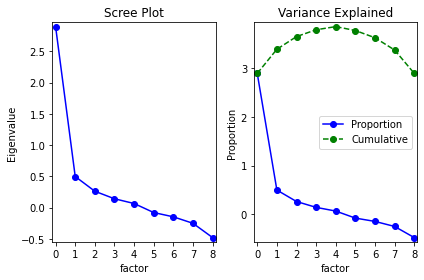

In [ ]:
#make the scree plot
#green line is cummulative variance
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [ ]:
#sklearn matches the research paper paramterts
from statsmodels.multivariate.pca import PCA
pc = PCA(df, ncomp = 9, standardize = True, demean = True) #demean = mean centering
#if we pass X_std we don't need to demean it, standarized means = getting it within a range


In [ ]:
#compute the loadings on the variables
df_comp = pc.loadings
df_comp

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8
Climate,0.206414,0.217835,-0.689956,0.137321,-0.369150,0.374605,-0.084706,-0.362308,0.001391
Housing,0.356522,0.250624,-0.208172,0.511829,0.233488,-0.141640,-0.230639,0.613855,0.013600
Healthcare,0.460215,-0.299465,-0.007325,0.014702,-0.103241,-0.373848,0.013868,-0.185676,-0.716355
Crime,0.281298,0.355342,0.185105,-0.539050,-0.523940,0.080923,0.018606,0.430025,-0.058608
Transportation,0.351151,-0.179604,0.146376,-0.302904,0.404348,0.467592,-0.583391,-0.093599,0.003629
Education,0.275293,-0.483382,0.229703,0.335411,-0.208819,0.502170,0.426182,0.188668,0.110840
Arts,0.463054,-0.194790,-0.026484,-0.101080,-0.105098,-0.461881,-0.021525,-0.203990,0.685758
Recreation,0.327888,0.384475,-0.050853,-0.189801,0.529541,0.089916,0.627878,-0.150596,-0.025506
Economic,0.135412,0.471283,0.607314,0.421770,-0.159620,0.032608,-0.149741,-0.404809,0.000438


maximum and minimum corelation = 1 and -1
loading is a measure of corelation, if it is between -0.3 and 0.3. Spurious correlation

In [ ]:
#computing the PC scores
scores = pd.DataFrame(pc.factors)
scores
#every component has got a loading factor here


,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8
0,-0.031110,0.044790,0.074247,0.029335,-0.035953,0.034618,-0.033322,-0.098083,0.055282
1,0.013154,0.003762,-0.059677,-0.063994,0.063420,-0.043706,-0.000935,-0.040999,-0.019364
2,-0.056095,0.003498,0.003791,-0.002660,-0.043230,-0.049654,-0.018833,0.043266,-0.014990
3,0.027239,-0.091086,0.056650,0.033003,0.048928,0.088395,-0.036071,-0.036373,0.050488
4,0.064281,0.016480,0.001020,-0.059350,-0.015176,0.089298,-0.012153,-0.014516,-0.048877
...,...,...,...,...,...,...,...,...,...
324,-0.004217,-0.082294,-0.011932,0.070438,-0.042670,0.024206,0.012507,0.030255,-0.063731
325,-0.033875,0.037076,-0.016503,-0.064179,0.006350,0.001934,0.020272,-0.006120,0.023047
326,-0.051090,-0.045350,-0.034005,0.077145,-0.019836,-0.023981,0.013437,0.013388,0.026393
327,-0.022889,-0.053889,-0.049725,-0.025076,-0.036629,0.001882,0.031702,0.038258,0.009172


MLR_PCA_Multicolinearity. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv("longley.csv")
df_1.head()


,Obs,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,60323,83.0,234289,2356,1590,107608,1947
1,2,61122,88.5,259426,2325,1456,108632,1948
2,3,60171,88.2,258054,3682,1616,109773,1949
3,4,61187,89.5,284599,3351,1650,110929,1950
4,5,63221,96.2,328975,2099,3099,112075,1951


In [ ]:
df = df_1.iloc[:, 2:7]
#regression faces the problem of multiple correlation
print(df.head())

   GNPDEFL     GNP  UNEMP  ARMED     POP
0     83.0  234289   2356   1590  107608
1     88.5  259426   2325   1456  108632
2     88.2  258054   3682   1616  109773
3     89.5  284599   3351   1650  110929
4     96.2  328975   2099   3099  112075


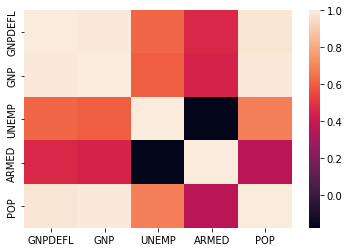

In [ ]:
sns.heatmap(df.corr())#it is a correlation map
plt.show()
#multicollinearity makes it hard for us to analyse the corelation between two variables

In [ ]:
#y_i = b_0 + b_1x_1 + b_2x_2 + . . . + bnxn
X = df
Y = df_1['TOTEMP']

In [ ]:
import statsmodels.api as sm
#programers forgot to put the bias term b0
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.70e-09
Time:                        08:32:07   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.246e+04   3.52e+04      2.629      0.025    1.41e+04    1.71e+05
GNPDEFL      -48.4628    132.248     -0.366      0.722    -343.129     246.204
GNP            0.0720      0.032      2.269      0.047       0.001       0.143
UNEMP         -0.4039      0.439     -0.921      0.379      -1.381       0.573
ARMED         -0.5605      0.284     -1.975      0.077      -1.193       0.072
POP           -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#we needto fix multicolinerarity
from statsmodels.multivariate.pca import PCA
pc = PCA(df, ncomp = 4, standardize = True) #df should have just the features
df_comp = pc.loadings.T
#pc.loadings are the eigen vectors that we computed, we are transposing it so that we can see it nicely
df_comp

,GNPDEFL,GNP,UNEMP,ARMED,POP
comp_0,0.521013,0.519909,0.365806,0.229642,0.521240
comp_1,-0.058090,-0.053455,0.595323,-0.798315,0.045299
comp_2,0.188915,0.317497,-0.710076,-0.551157,0.235635
comp_3,0.776958,-0.135947,0.004615,-0.078584,-0.609637


In [ ]:
#pca scores
X_scores = pc.factors
X_scores

,comp_0,comp_1,comp_2,comp_3
0,-0.421723,0.179096,0.168870,-0.347564
1,-0.364998,0.202319,0.366133,0.259528
2,-0.276955,0.366830,-0.286991,-0.017918
3,-0.253868,0.304045,-0.072166,-0.122680
4,-0.168318,-0.294286,-0.013361,0.197849
5,-0.117556,-0.457752,-0.090784,0.093485
6,-0.085413,-0.454998,0.036854,-0.150349
7,0.013020,-0.141273,-0.595811,-0.135131
8,0.007821,-0.165155,-0.062547,-0.203438
9,0.046341,-0.130467,0.161966,0.046931


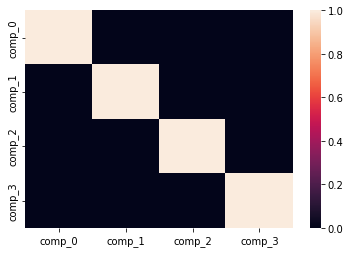

In [ ]:
sns.heatmap(X_scores.corr())#it is a correlation map
plt.show()
#orthogonality, correlation = 0

In [ ]:
#first run the PCA and then do the following lines of code
X_pca = sm.add_constant(X_scores)
model = sm.OLS(Y,X_pca).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.06e-09
Time:                        09:01:02   Log-Likelihood:                -120.05
No. Observations:                  16   AIC:                             250.1
Df Residuals:                      11   BIC:                             254.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+04    132.360    493.479      0.000     6.5e+04    6.56e+04
comp_0      1.293e+04    529.441     24.430      0.000    1.18e+04    1.41e+04
comp_1     -1648.5478    529.441     -3.114      0.010   -2813.839    -483.256
comp_2      3448.2146    529.441      6.513      0.000    2282.923    4613.506
comp_3       170.4600    529.441      0.322      0.754    -994.831    1335.751
==============================================================================
Omnibus:                        5.058   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                2.456
Skew:                           0.843   Prob(JB):                        0.293
Kurtosis:                       3.919   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Steps:
1. remove the 
co-linearity remove
2. perform pca, 
3. perform linear regression 
4. Why did we take ncomp = 3?
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.
5. Is 2 = 3? in math no but in statistics it is true 2 = 3.
6. In statistics '=' means similarity. 
7. There is a boundary wall, will discuss it later
8. If the boundary walls contains a zero then statiscally coefficient is equal to zero, hence the coefficient is equal o zero and it can be dropped, the p value also says the same thing. p value says the same thing. What is p here? It is called a confidence interval. If p is more than 0.05 we drop it. 